# MAGxHR_1B (Magnetic field 50Hz)

> Abstract: Access to the high rate (50Hz) magnetic data (level 1b product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.11.6
IPython version      : 8.18.0

viresclient: 0.11.6
pandas     : 2.1.3
xarray     : 2023.12.0
matplotlib : 3.8.2



In [2]:
from viresclient import SwarmRequest
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [3]:
request = SwarmRequest()

## Product information

The 50Hz measurements of the magnetic field vector (`B_NEC`) and total intensity (`F`).

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#MAGX_HR_1B_Product

Measurements are available through VirES as part of collections with names containing `MAGx_HR`, for each Swarm spacecraft:

In [4]:
request.available_collections("MAG_HR", details=False)

{'MAG_HR': ['SW_OPER_MAGA_HR_1B',
  'SW_OPER_MAGB_HR_1B',
  'SW_OPER_MAGC_HR_1B',
  'SW_FAST_MAGA_HR_1B',
  'SW_FAST_MAGB_HR_1B',
  'SW_FAST_MAGC_HR_1B']}

The measurements can be used together with geomagnetic model evaluations as shall be shown below.

### Check what "MAG_HR" data variables are available

In [5]:
request.available_measurements("MAG_HR")

['F',
 'B_VFM',
 'B_NEC',
 'dB_Sun',
 'dB_AOCS',
 'dB_other',
 'B_error',
 'q_NEC_CRF',
 'Att_error',
 'Flags_B',
 'Flags_q',
 'Flags_Platform']

## Fetch and load data

In [6]:
request = SwarmRequest()
request.set_collection("SW_OPER_MAGA_HR_1B")
request.set_products(
   measurements=["B_NEC"],
)
data = request.get_between(
   start_time="2015-06-21T12:00:00Z", 
   end_time="2015-06-21T12:01:00Z",
   asynchronous=False
)

Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.181MB)

In [7]:
data.sources

['SW_OPER_MAGA_HR_1B_20150621T000000_20150621T235959_0602_MDR_MAG_HR']

In [8]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 3000, NEC: 3)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2015-06-21T12:00:00.007250176 ... ...
  * NEC         (NEC) <U1 'N' 'E' 'C'
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Longitude   (Timestamp) float64 -17.17 -17.17 -17.17 ... -17.12 -17.12
    Latitude    (Timestamp) float64 -41.84 -41.83 -41.83 ... -38.01 -38.01
    B_NEC       (Timestamp, NEC) float64 9.677e+03 -3.496e+03 ... -1.817e+04
    Radius      (Timestamp) float64 6.837e+06 6.837e+06 ... 6.836e+06 6.836e+06
Attributes:
    Sources:         ['SW_OPER_MAGA_HR_1B_20150621T000000_20150621T235959_060...
    MagneticModels:  []
    AppliedFilters:  []

## Visualisation of data

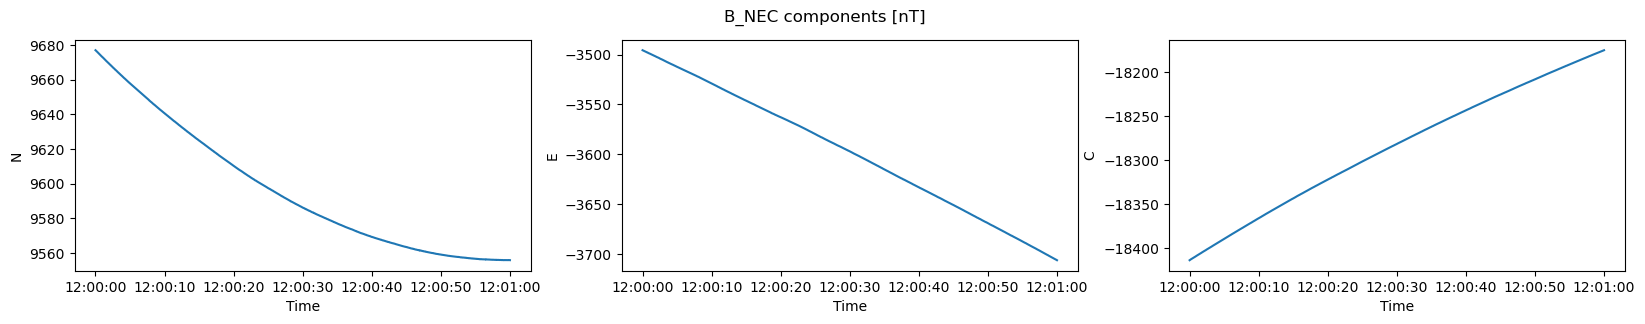

In [9]:
fig, axes = plt.subplots(figsize=(20, 3), ncols=3, sharex=True)
for i in range(3):
    axes[i].plot(ds["Timestamp"], ds["B_NEC"][:, i])
    axes[i].set_ylabel("NEC"[i])
    axes[i].set_xlabel("Time")
fig.suptitle("B_NEC components [nT]");

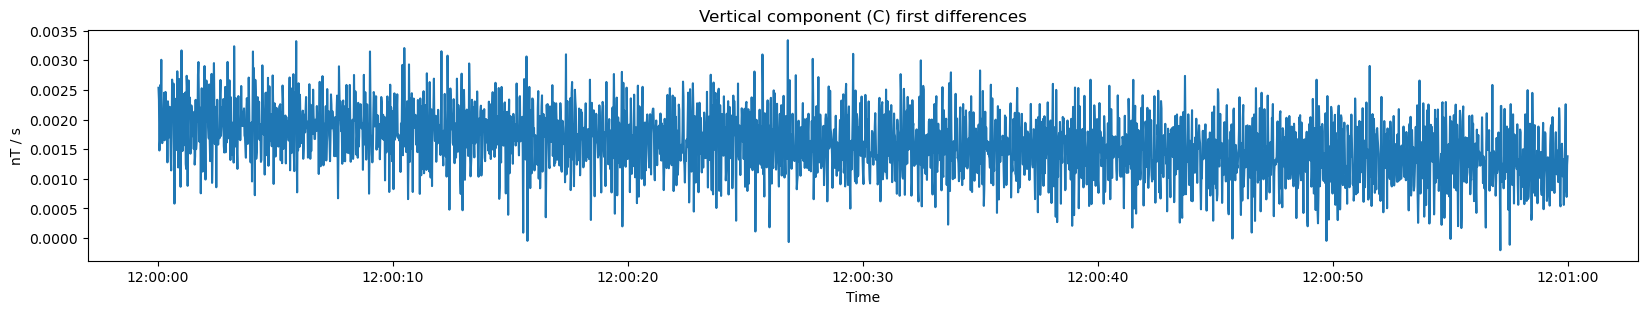

In [10]:
fig, ax = plt.subplots(figsize=(20, 3))
dBdt = np.diff(ds["B_NEC"], axis=0) * (1/50)
ax.plot(ds["Timestamp"][1:], dBdt[:, 2])
ax.set_ylabel("nT / s")
ax.set_xlabel("Time")
ax.set_title("Vertical component (C) first differences");